In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# 读取数据集
df = pd.read_csv("H:\\课程\\毕业论文\\data_ori_cleanded\\total_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_language', 'Tweet_place', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count', 'User_location', 'Tweet_isRT', 'results', 'hateful',
       'aggressive', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity', 'Unnamed: 0'],
      dtype='object')

In [4]:
df=df[[ 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count','hateful', 'aggressive', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity']]

In [8]:
df.to_csv("H:\\课程\\毕业论文\\data_ori_cleanded\\total_data_1.csv")

In [5]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,1319312054130389000,...,0,364,0,0,0,1.666667,NaN,NaN,4.75,NaN
1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,1206183985337925632,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,1358656011964276737,...,0,1072,0,0,0,1.666667,NaN,NaN,NaN,NaN
3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,1119787693267771392,...,1,196,0,0,0,1.666667,NaN,NaN,5.25,NaN
4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,1206183985337925632,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df[['care', 'fairness', 'loyalty', 'authority','purity']]=df[['care', 'fairness', 'loyalty', 'authority','purity']].fillna(0)

In [7]:
def normalize_data(data):
    if data ==0:
        return 0
    else:
        return (data-1)/4-1

In [8]:
df.fairness = df.fairness.apply(normalize_data)
df.loyalty = df.loyalty.apply(normalize_data)
df.authority = df.authority.apply(normalize_data)
df.purity = df.purity.apply(normalize_data)
df.care = df.care.apply(normalize_data)

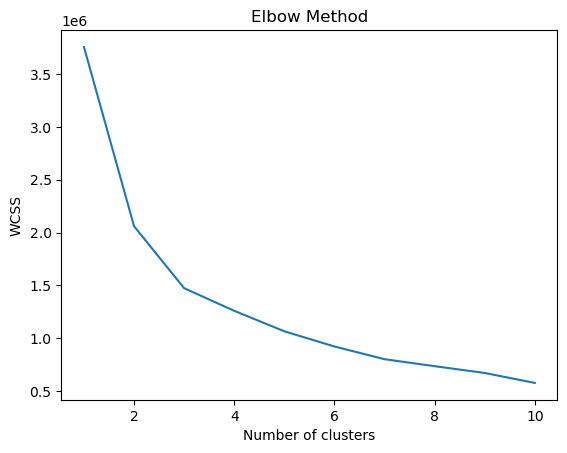

In [12]:
X = df[['care', 'fairness', 'loyalty', 'authority','purity']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

df['cluster'] = pd.Series(pred_y, index=df.index)

In [11]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity,cluster
0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,1319312054130389000,...,364,0,0,0,-0.833333,0.0,0.0,-0.0625,0.0,1
1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,1206183985337925632,...,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0,0
2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,1358656011964276737,...,1072,0,0,0,-0.833333,0.0,0.0,0.0000,0.0,1
3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,1119787693267771392,...,196,0,0,0,-0.833333,0.0,0.0,0.0625,0.0,1
4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,1206183985337925632,...,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0,0


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet_words = tweet.split()
    tweet_words = [word for word in tweet_words if word not in stop_words]
    tweet_words = [ps.stem(word) for word in tweet_words]
    return tweet_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\范宏瑞\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.Tweet_content = df.Tweet_content.apply(preprocess_tweet)

In [17]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity,cluster
0,2022-02-22,1496090169229058054,"[russian, troop, enter, eastern, ukrain, russi...",0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,1319312054130389000,...,364,0,0,0,-0.833333,0.0,0.0,-0.0625,0.0,1
1,2022-02-22,1496093418870951937,"[iran, urg, restraint, ukrain, crisis,, blame,...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,1206183985337925632,...,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0,0
2,2022-02-22,1496094215000195073,"[current, affair, emoji, cara, revolviéndos, d...",22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,1358656011964276737,...,1072,0,0,0,-0.833333,0.0,0.0,0.0000,0.0,1
3,2022-02-22,1496094912215130116,"[russian, presid, vladimir, putin, order, troo...",1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,1119787693267771392,...,196,0,0,0,-0.833333,0.0,0.0,0.0625,0.0,1
4,2022-02-22,1496097094352121866,"[putin, call, ukrainian, statehood, fiction., ...",0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,1206183985337925632,...,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0,0


In [18]:
df.to_csv("H:\\课程\\毕业论文\\data_ori_cleanded\\total_data_cluster3.csv")

In [ ]:
_